In [2]:
library(affy)
library(limma)
library(stringr)
library(AnnoProbe)
library(magrittr)

Warning message:
"package 'affy' was built under R version 4.2.2"
Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Warning message:
"package 'Biobase' was built under R version 4.2.3"
Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Warning me

In [17]:
setwd('/import/jliu//data2/')

In [18]:
rawdata <- affy::ReadAffy(celfile.path = "./res/gz/")

In [19]:
rawdata %<>% affy::rma()
exprs <- Biobase::exprs(rawdata)
range(exprs, na.rm = TRUE) # 1.889917 14.620563 不超过50不需要log2转化
colnames(exprs) <- stringr::str_split(string=colnames(exprs),pattern = "_", simplify = T)[, 1]

Warning message:
"replacing previous import 'AnnotationDbi::tail' by 'utils::tail' when loading 'hgu133plus2cdf'"
Warning message:
"replacing previous import 'AnnotationDbi::head' by 'utils::head' when loading 'hgu133plus2cdf'"




Background correcting
Normalizing
Calculating Expression


[1]  1.123784 14.531373

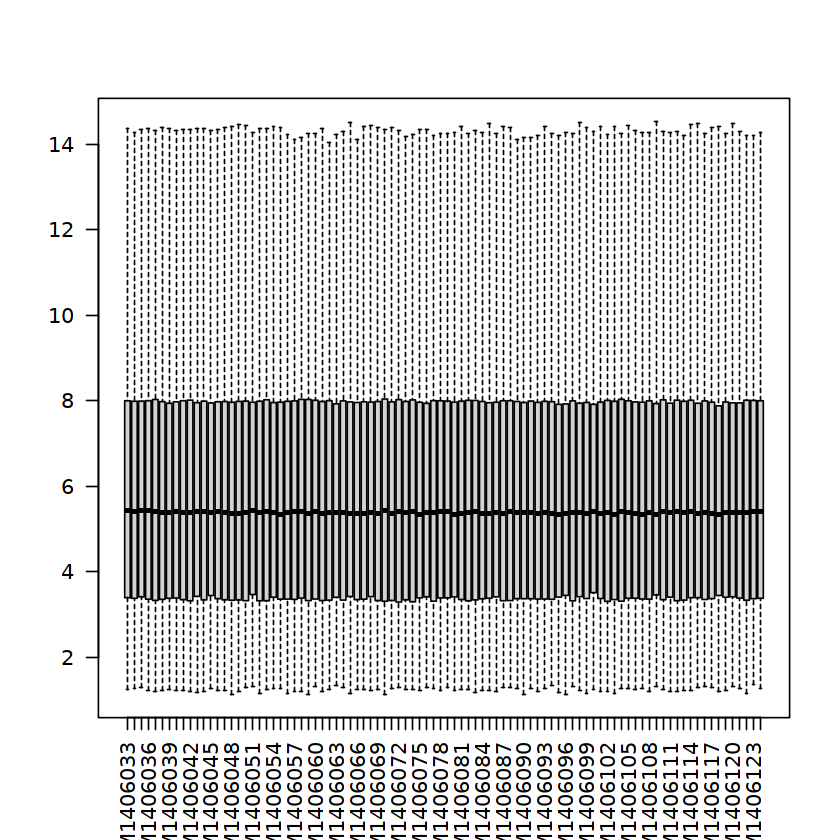

[1]  1.234074 14.313218

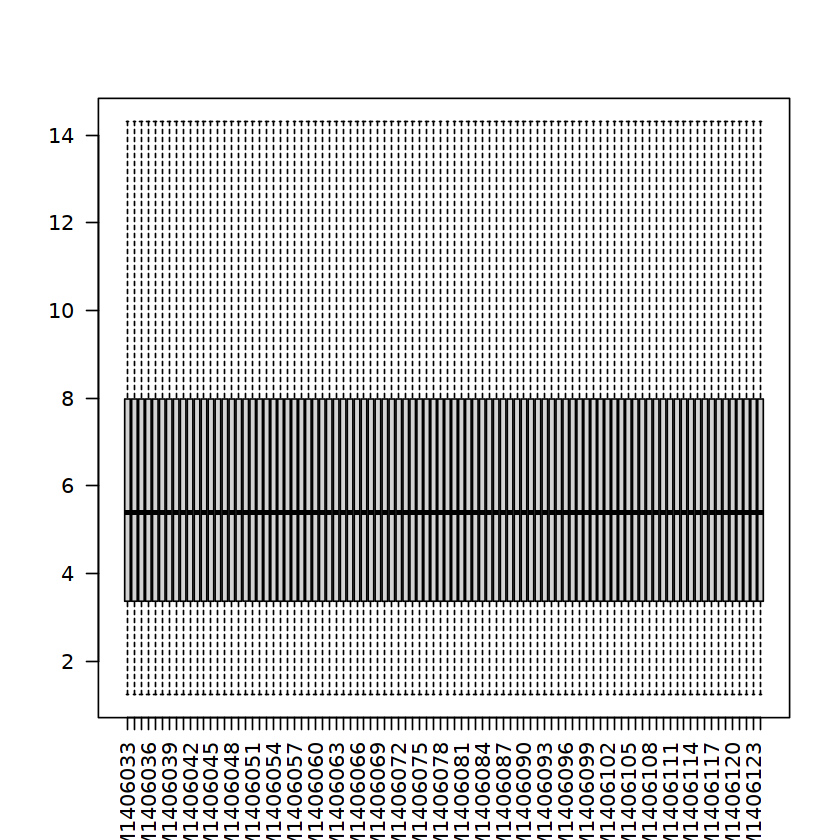

In [20]:
boxplot(exprs, outline = FALSE, notch = FALSE, las = 2)
#分位数校正
exprs %<>% limma::normalizeBetweenArrays()
boxplot(exprs, outline = FALSE, notch = FALSE, las = 2)
range(exprs, na.rm = TRUE) # 2.09520 14.30741


In [21]:
library(tibble)
exprs %<>% as_tibble(rownames = "probe_id")

Warning message:
"package 'tibble' was built under R version 4.2.3"


In [22]:
probe2Symbol <- AnnoProbe::idmap("GPL570")

In [23]:
library(dplyr)

In [24]:
transid <- function(probe2Symbol, exprs, method = "median") {
    probe2Symbol$probe_id %<>% as.character()
    exprs$probe_id %<>% as.character()
    exprs %>%
        dplyr::inner_join(probe2Symbol, by = "probe_id") %>%
        dplyr::select(-probe_id) %>% 
        dplyr::select(symbol, everything()) %>%
        dplyr::mutate(ref = apply(across(where(is.numeric)), 1, method)) %>%
        dplyr::arrange(desc(ref)) %>%
        dplyr::select(-ref) %>%
        dplyr::distinct(symbol, .keep_all = TRUE)
}

expression <- transid(probe2Symbol, exprs, method = "median") %>% tibble::column_to_rownames(.,'symbol') %>%  t() %>% as.data.frame()

In [25]:
info = read.table('../array.info.txt',header =T,sep = '\t')

In [26]:
expr = expression [info$sample,]

In [27]:
head(info)

,sample,group
,<chr>,<chr>
1,GSM1406033,con
2,GSM1406034,con
3,GSM1406035,con
4,GSM1406036,con
5,GSM1406037,con
6,GSM1406038,con


In [28]:
table(info$group)


 CI con 
 69  23 

In [29]:
Group = c(rep('con',23),rep('CI',69))

In [30]:
colnames(expr) = gsub('-','.',colnames(expr))

In [31]:
set.seed(1234)
#expr = as.data.frame(apply(expr,2,as.numeric))
expr3 = cbind(Group,expr)

In [32]:
head(expr3,2)

,Group,HBB,FTL,RPL32,FTH1,ACTB,RPL37A,RPS4X,COX2,RPL23A,...,LINC00558,PABPC5,SERPINB4,SLC17A8,KRTAP19.1,MGAT4D,KRTAP4.7,ZNF750,DEFB132,LINC00485
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM1406033,con,13.98038,13.91171,13.85454,13.78287,13.62081,13.71063,13.71972,13.70411,13.73756,...,1.941870,1.625843,1.788408,1.979318,1.553334,1.658299,1.438367,1.420060,1.514858,1.413483
GSM1406034,con,13.91171,13.95863,13.87920,13.81116,13.52864,13.78287,13.65988,13.68078,13.70411,...,1.570279,1.821211,1.527352,1.591427,1.450832,1.484369,1.554393,1.463129,1.523600,1.312701


In [33]:
expr3$Group = ifelse(expr3$Group == 'CI',1,0)
expr3$Group = as.factor(expr3$Group)

In [34]:


model.gene =  c('FAM200B','BCL2A1','JCHAIN','TXN')
expr4 = expr3 %>% dplyr::select(c(Group,model.gene))
dim(expr4)

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
i Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(model.gene)

  # Now:
  data %>% select(all_of(model.gene))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."


[1] 92  5

Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels:

[1] 0.9645391

 [1] 0.9656566 0.9540670 0.9848485 0.9555556 0.9642857 0.9578947 0.9573413
 [8] 0.9555556 0.9693780 0.9808081


Setting levels: control = 1, case = 2

Setting direction: controls < cases



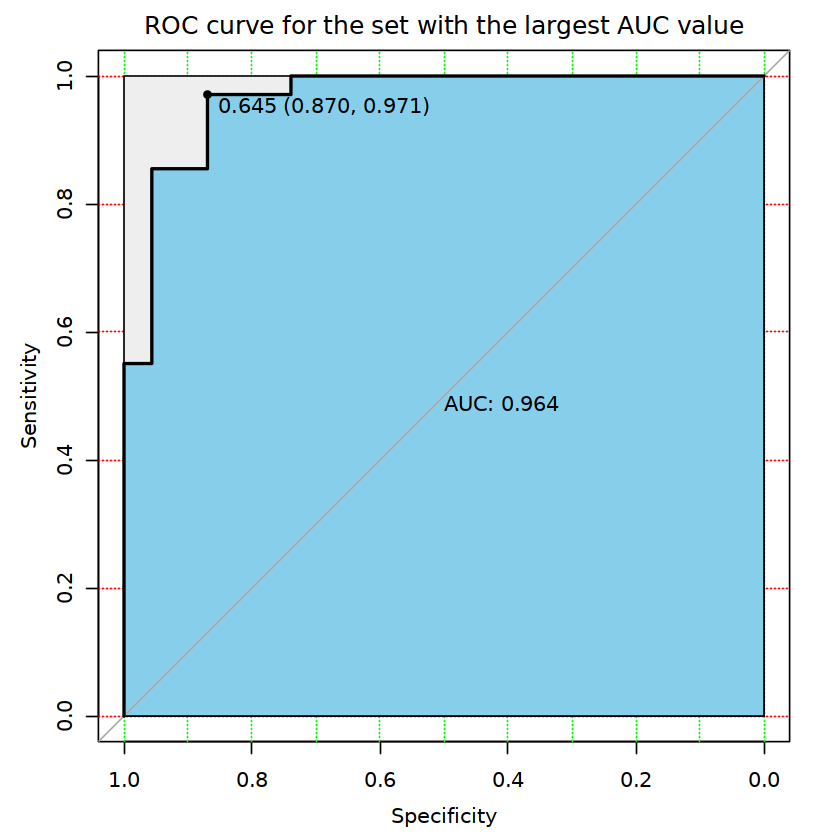

In [35]:
library(caret)
data = expr4
set.seed(1)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=5,times=10)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=data,family=binomial())
    
  model_pre<-predict(model,type='response', newdata=train)
    
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(train[,1]),model_pre)))
}
mean(auc_value)
num <- which.max(auc_value)
print(auc_value)
fold_train <- data[folds[[num]],]   
fold_test <- data[-folds[[num]],]
fold_pre <- glm(Group~.,data=data,family=binomial())
fold_predict <- predict(fold_pre,type='response',newdata=data)
roc_curve <- pROC::roc(as.numeric(data$Group),fold_predict)
plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("green", "red"), max.auc.polygon=TRUE,
     auc.polygon.col="skyblue", print.thres=TRUE,main="ROC curve for the set with the largest AUC value")

In [36]:
library("autoReg")
overall.log =  glm(Group~.,data=data,family=binomial())
model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)
model3

name,desc,0 (N=23),1 (N=69),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
FAM200B,Mean <U+00B1> SD,9.9 <U+00B1> 0.2,10.1 <U+00B1> 0.2,FAM200B,"47.85 (3.87-592.17, p=.003)","0.00 (0.00-0.33, p=.024)"
BCL2A1,Mean <U+00B1> SD,10.7 <U+00B1> 0.6,11.7 <U+00B1> 0.6,BCL2A1,"20.65 (5.43-78.56, p<.001)","0.75 (0.10-5.66, p=.776)"
JCHAIN,Mean <U+00B1> SD,9.4 <U+00B1> 0.8,9.7 <U+00B1> 0.8,JCHAIN,"1.58 (0.85-2.92, p=.146)",
TXN,Mean <U+00B1> SD,10.5 <U+00B1> 0.4,11.3 <U+00B1> 0.3,TXN,"750.59 (39.45-14282.23, p<.001)","55602.20 (128.82-23998817.27, p<.001)"


In [37]:
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following object is masked from 'package:BiocGenerics':

    var


The following objects are masked from 'package:stats':

    cov, smooth, var




In [39]:
head(data,2)

,Group,FAM200B,BCL2A1,JCHAIN,TXN
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
GSM1406033,0,9.959489,10.80951,8.743320,10.58784
GSM1406034,0,9.854623,11.16898,8.725029,10.38764


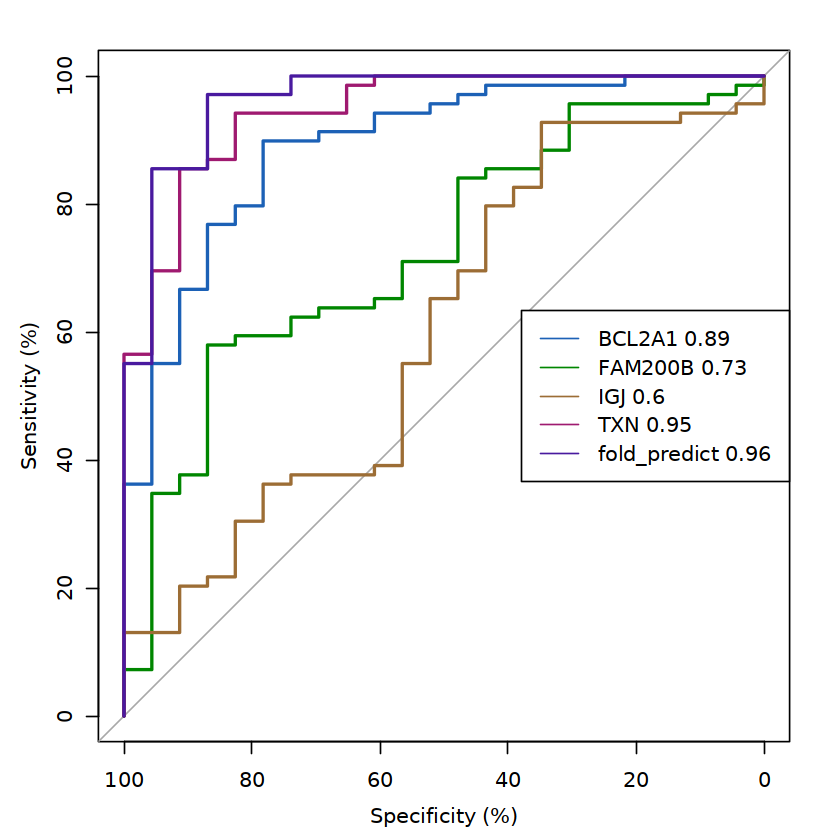

In [40]:
#pdf('ROC3.pdf',width = 6,height = 6)
rocobj1 <- plot.roc(data$Group, data$BCL2A1,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
rocobj2 <- lines.roc(data$Group, data$FAM200B,percent=TRUE, levels=c(0,1),direction="<", col="#008600")
rocobj3 <- lines.roc(data$Group, data$JCHAIN,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")
rocobj4 <- lines.roc(data$Group, data$TXN,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")
rocobj5 <- lines.roc(data$Group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#491A9F")
legend("right", legend=c(paste0("BCL2A1 ", round(rocobj1$auc/100,digits = 2)),
                               paste0("FAM200B ", round(rocobj2$auc/100,digits = 2)),
                               paste0("IGJ ", round(rocobj3$auc/100,digits = 2)),
                               paste0("TXN ", round(rocobj4$auc/100,digits = 2)),
                               paste0("fold_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#008600","#9C6D35","#9F1A70","#491A9F"), lwd=1)
#dev.off()